In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2018-07-07 11:15:00,0.0,10.4,37.364
1,2018-07-07 11:30:00,0.0,10.4,37.594
2,2018-07-07 11:45:00,0.0,10.4,37.590
3,2018-07-07 12:00:00,0.0,10.5,37.587
4,2018-07-07 12:15:00,0.0,10.5,37.584


In [3]:
print('SoilMoisture(%)', mtalbert['SoilMoisture(%)'].describe())
print('SoilTemp(c)', mtalbert['SoilTemp(c)'].describe())
print('Rain(mm)', mtalbert['Rain(mm)'].describe())

SoilMoisture(%) count    187530.000000
mean         43.446196
std           5.155830
min          34.323000
25%          38.480000
50%          44.229000
75%          47.577000
max          53.250000
Name: SoilMoisture(%), dtype: float64
SoilTemp(c) count    187530.00000
mean         17.07999
std           3.66501
min           9.40000
25%          13.90000
50%          16.70000
75%          20.40000
max          25.40000
Name: SoilTemp(c), dtype: float64
Rain(mm) count    187530.00000
mean          0.14608
std          22.53662
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max        5408.00000
Name: Rain(mm), dtype: float64


#  Seasonal for soil moisture, soil temperature, and rainfall
- Summer: December to February
- Autumn: March to May
- Winter: June to August
- Spring: September to November

In [4]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]: 
        return 'Autumn'
    elif month in [6, 7, 8]: 
        return 'Winter'
    else:
        return 'Spring'

In [5]:
mtalbert['Year'] = mtalbert['Timestamp (UTC+12:00)'].dt.year
mtalbert['Month'] = mtalbert['Timestamp (UTC+12:00)'].dt.month
mtalbert['Season'] = mtalbert['Month'].apply(get_season)
mtalbert.head()


,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),Year,Month,Season
0,2018-07-07 11:15:00,0.0,10.4,37.364,2018,7,Winter
1,2018-07-07 11:30:00,0.0,10.4,37.594,2018,7,Winter
2,2018-07-07 11:45:00,0.0,10.4,37.590,2018,7,Winter
3,2018-07-07 12:00:00,0.0,10.5,37.587,2018,7,Winter
4,2018-07-07 12:15:00,0.0,10.5,37.584,2018,7,Winter


In [6]:
seasonal_means = mtalbert.groupby(['Year', 'Season']).agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'sum'
}).reset_index()

print(seasonal_means)


    Year  Season  SoilMoisture(%)  SoilTemp(c)  Rain(mm)
0   2018  Winter        40.728507    11.620830     99.91
1   2019  Autumn        42.008578    15.370129     33.75
2   2019  Spring        45.797121    16.380491    351.91
3   2019  Summer        38.699315    21.174496     93.95
4   2019  Winter        46.115090    12.528551    494.29
5   2020  Autumn        35.679585    18.023177    218.94
6   2020  Spring        41.199940    16.879455    217.73
7   2020  Summer        36.932246    21.266529     50.48
8   2020  Winter        43.192310    13.326608    517.68
9   2021  Autumn        38.477429    18.165447    277.75
10  2021  Spring        46.117471    17.074210    308.69
11  2021  Summer        38.624021    21.714410    214.75
12  2021  Winter        44.535087    12.881941    367.64
13  2022  Autumn        37.122928    18.867226    203.50
14  2022  Spring        47.113186    17.126988    416.00
15  2022  Summer        40.173106    22.375220    173.00
16  2022  Winter        47.7797

In [7]:
seasonal_means.to_csv()

',Year,Season,SoilMoisture(%),SoilTemp(c),Rain(mm)\r\n0,2018,Winter,40.7285072080053,11.620829655781112,99.91000000000001\r\n1,2019,Autumn,42.008577937643885,15.370129496402877,33.75\r\n2,2019,Spring,45.79712082522272,16.38049062941257,351.91\r\n3,2019,Summer,38.69931546818884,21.174495967741937,93.95\r\n4,2019,Winter,46.115090126811594,12.52855147946841,494.29\r\n5,2020,Autumn,35.6795853902474,18.023177083333334,218.94\r\n6,2020,Spring,41.19994043803457,16.879454746642054,217.73\r\n7,2020,Summer,36.932245764652016,21.266529304029305,50.480000000000004\r\n8,2020,Winter,43.192309971316234,13.326607789855073,517.68\r\n9,2021,Autumn,38.477428935447904,18.165447338618346,277.75\r\n10,2021,Spring,46.117471115689675,17.074210164835165,308.69\r\n11,2021,Summer,38.62402106481482,21.71440972222222,214.75\r\n12,2021,Winter,44.535086654588994,12.881940670289856,367.64\r\n13,2022,Autumn,37.12292809939221,18.867225557947208,203.5\r\n14,2022,Spring,47.11318594672239,17.126987706411345,416.0\r\n15,20

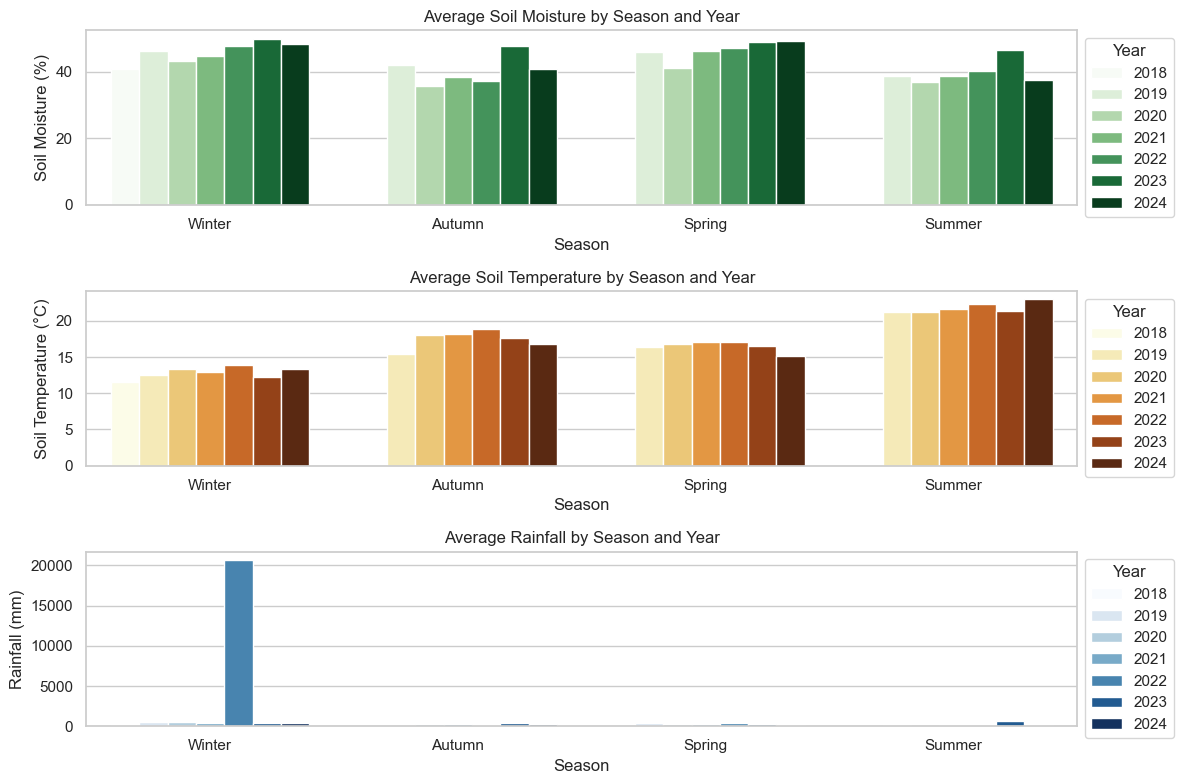

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create a bar plot for each variable
plt.figure(figsize=(12, 8))

# Soil Moisture
plt.subplot(3, 1, 1)
sns.barplot(x='Season', y='SoilMoisture(%)', hue='Year', data=seasonal_means, palette='Greens')
plt.title('Average Soil Moisture by Season and Year')
plt.ylabel('Soil Moisture (%)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Soil Temperature
plt.subplot(3, 1, 2)
sns.barplot(x='Season', y='SoilTemp(c)', hue='Year', data=seasonal_means, palette='YlOrBr')
plt.title('Average Soil Temperature by Season and Year')
plt.ylabel('Soil Temperature (°C)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Rainfall
plt.subplot(3, 1, 3)
sns.barplot(x='Season', y='Rain(mm)', hue='Year', data=seasonal_means, palette='Blues')
plt.title('Average Rainfall by Season and Year')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


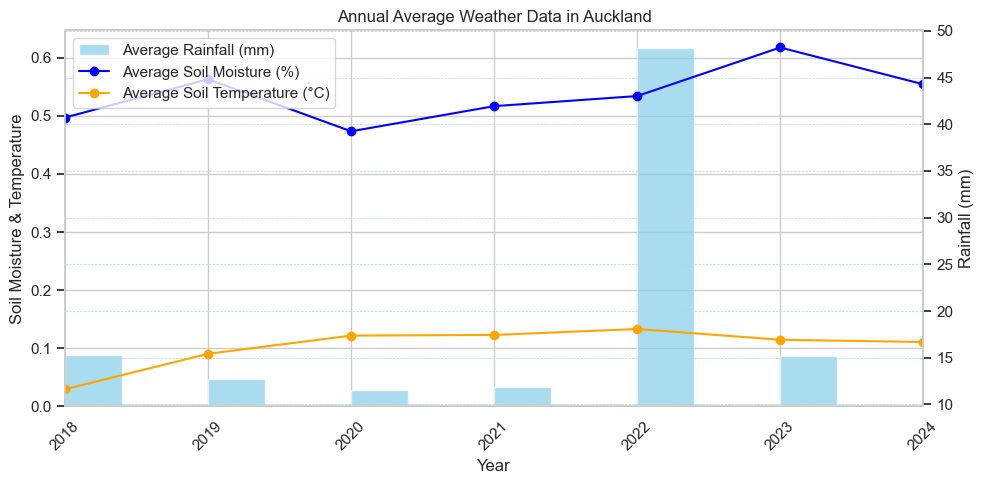

In [9]:
mean_values = mtalbert.groupby('Year').agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'mean'
}).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))


# Create a secondary y-axis for Rain
rain_hist = ax1.hist(mean_values['Year'], weights=mean_values['Rain(mm)'], bins=len(mean_values['Year'])-1, alpha=0.7, color='skyblue',  width=0.4, align='mid', label='Average Rainfall (mm)')

# Plot Soil Moisture and Temperature
ax2 = ax1.twinx()
soil_moisture_line = mean_values.plot(x='Year', y='SoilMoisture(%)', ax=ax2, color='blue', label='Average Soil Moisture (%)', alpha=1, marker="o")
soil_temp_line = mean_values.plot(x='Year', y='SoilTemp(c)', ax=ax2, color='orange', label='Average Soil Temperature (°C)', alpha=1, marker="o")

ax1.set_xlim(mean_values['Year'].min(), mean_values['Year'].max())
ax1.set_xticks(mean_values['Year'])
ax1.set_xticklabels(mean_values['Year'], rotation=45)

# Set labels and titles
ax1.set_xlabel('Year')
ax1.set_ylabel('Soil Moisture & Temperature')
ax2.set_ylabel('Rainfall (mm)')
plt.title('Annual Average Weather Data in Auckland')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(color = 'lightblue', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

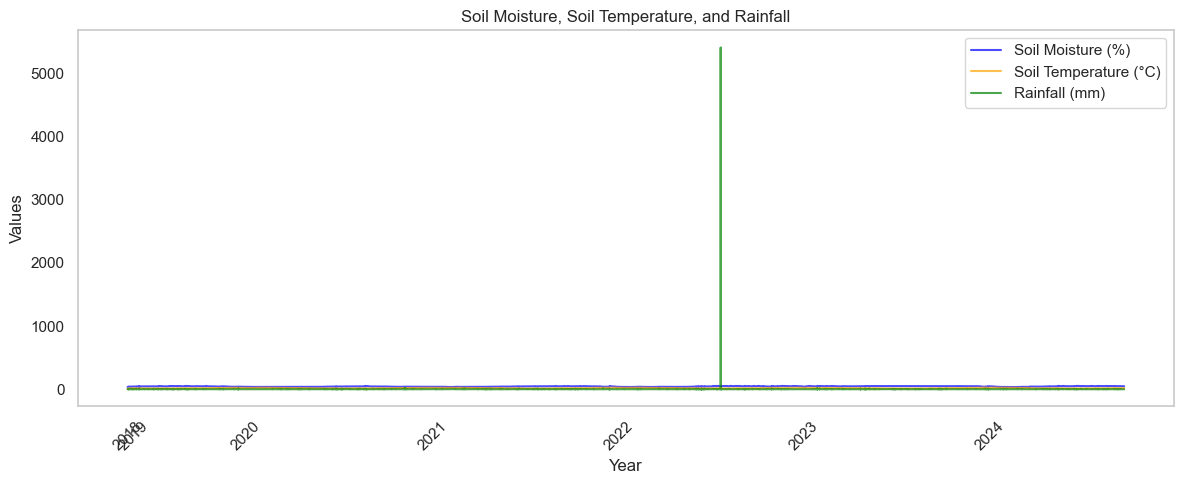

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
data_to_plot = mtalbert[['SoilMoisture(%)', 'SoilTemp(c)', 'Rain(mm)', 'Year']]


data_to_plot['SoilMoisture(%)'].plot(ax=ax, color='blue', label='Soil Moisture (%)', alpha=0.7)
mtalbert['SoilTemp(c)'].plot(ax=ax, color='orange', label='Soil Temperature (°C)', alpha=0.7)
mtalbert['Rain(mm)'].plot(ax=ax, color='green', label='Rainfall (mm)', alpha=0.7)

year_starts = mtalbert.groupby('Year').head(1).index
years = mtalbert['Year'].unique()  # Get unique years
ax.set_xticks(year_starts)  # Set x-ticks for each year
ax.set_xticklabels(years, rotation=45)  # Set the year labels

ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')


ax.set_xlabel('Year')
ax.set_ylabel('Values')
plt.title('Soil Moisture, Soil Temperature, and Rainfall')

ax.legend()

plt.grid()
plt.tight_layout()
plt.show()


In [11]:
mtalbert.describe()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),Year,Month
count,187530,187530.00000,187530.00000,187530.000000,187530.000000,187530.000000
mean,2022-01-17 07:45:08.888178176,0.14608,17.07999,43.446196,2021.533573,6.661883
min,2018-07-07 11:15:00,0.00000,9.40000,34.323000,2018.000000,1.000000
25%,2020-09-13 19:03:45,0.00000,13.90000,38.480000,2020.000000,4.000000
50%,2022-01-15 04:07:30,0.00000,16.70000,44.229000,2022.000000,7.000000
75%,2023-05-21 10:11:15,0.00000,20.40000,47.577000,2023.000000,9.000000
max,2024-10-21 20:00:00,5408.00000,25.40000,53.250000,2024.000000,12.000000
std,NaN,22.53662,3.66501,5.155830,1.598548,3.350800


In [12]:
print(mtalbert.dtypes)


Timestamp (UTC+12:00)    datetime64[ns]
Rain(mm)                        float64
SoilTemp(c)                     float64
SoilMoisture(%)                 float64
Year                              int32
Month                             int32
Season                           object
dtype: object


# Mean

In [13]:
averageSoilMoisture = mtalbert['SoilMoisture(%)'].mean()
averageSoilTemperature = mtalbert['SoilTemp(c)'].mean()
averageRain = mtalbert['Rain(mm)'].mean()
print('Average in mtalbert from 2014 to 2024')
print('Average Soil Moisture mtalbert: ', averageSoilMoisture, '\nAverage Soil Temperature mtalbert:',averageSoilTemperature , '\nAverage Rain mtalbert: ', averageRain)



Average in mtalbert from 2014 to 2024
Average Soil Moisture mtalbert:  43.446196042410996 
Average Soil Temperature mtalbert: 17.07999009272626 
Average Rain mtalbert:  0.14608036047565726


In [14]:
# Calculate mean values grouped by Year and Season

mean_values = mtalbert.groupby(['Year', 'Season']).agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'sum'
}).reset_index()
print(mean_values)

    Year  Season  SoilMoisture(%)  SoilTemp(c)  Rain(mm)
0   2018  Winter        40.728507    11.620830     99.91
1   2019  Autumn        42.008578    15.370129     33.75
2   2019  Spring        45.797121    16.380491    351.91
3   2019  Summer        38.699315    21.174496     93.95
4   2019  Winter        46.115090    12.528551    494.29
5   2020  Autumn        35.679585    18.023177    218.94
6   2020  Spring        41.199940    16.879455    217.73
7   2020  Summer        36.932246    21.266529     50.48
8   2020  Winter        43.192310    13.326608    517.68
9   2021  Autumn        38.477429    18.165447    277.75
10  2021  Spring        46.117471    17.074210    308.69
11  2021  Summer        38.624021    21.714410    214.75
12  2021  Winter        44.535087    12.881941    367.64
13  2022  Autumn        37.122928    18.867226    203.50
14  2022  Spring        47.113186    17.126988    416.00
15  2022  Summer        40.173106    22.375220    173.00
16  2022  Winter        47.7797

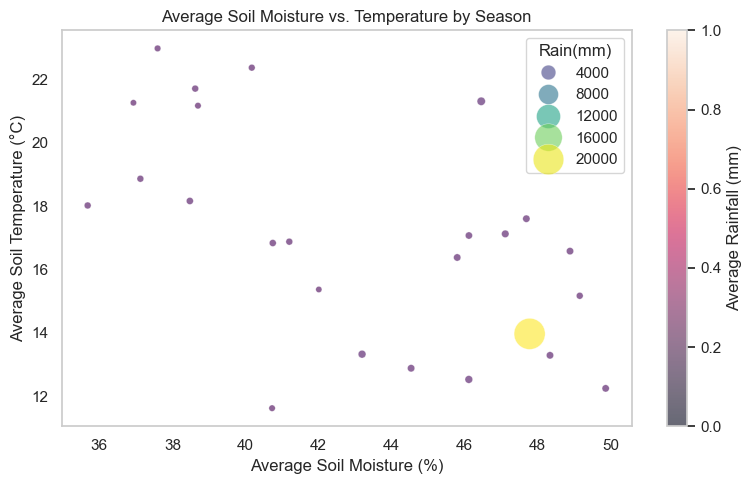

In [15]:
import seaborn as sns

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    data=mean_values,
    x='SoilMoisture(%)',
    y='SoilTemp(c)',
    size='Rain(mm)',
    sizes=(20, 500),  # Set the range for the marker sizes
    hue='Rain(mm)',  # Color based on rainfall
    palette='viridis',
    alpha=0.6,
    edgecolor='w'
)

plt.colorbar(scatter.collections[0], label='Average Rainfall (mm)')

# Set labels and title
plt.xlabel('Average Soil Moisture (%)')
plt.ylabel('Average Soil Temperature (°C)')
plt.title('Average Soil Moisture vs. Temperature by Season')

plt.grid()
plt.tight_layout()
plt.show()

# Median


In [16]:
medianSoilMoisture = mtalbert['SoilMoisture(%)'].median()
medianSoilTemperature = mtalbert['SoilTemp(c)'].median()
medianRain = mtalbert['Rain(mm)'].median()
print('The mid point in Mt Albert from 2014 to 2024')
print('Median Soil Moisture Mt Albert: ', medianSoilMoisture, '\nMedian Soil Temperature Mt Albert:',medianSoilTemperature , '\nMedian Rain Mt Albert: ', medianRain)


The mid point in Mt Albert from 2014 to 2024
Median Soil Moisture Mt Albert:  44.229 
Median Soil Temperature Mt Albert: 16.7 
Median Rain Mt Albert:  0.0


# Mode
The most common value

In [17]:
modeSoilMoisture = mtalbert['SoilMoisture(%)'].mode()
modeSoilTemperature = mtalbert['SoilTemp(c)'].mode()
modeRain = mtalbert['Rain(mm)'].mode()
print('The mid point in Mt Albert from 2014 to 2024')
print('Mode Soil Moisture Mt Albert: ', modeSoilMoisture, '\nMode Soil Temperature Mt Albert:',modeSoilTemperature , '\nMode Rain Mt Albert: ', modeRain)


The mid point in Mt Albert from 2014 to 2024
Mode Soil Moisture Mt Albert:  0    50.363
Name: SoilMoisture(%), dtype: float64 
Mode Soil Temperature Mt Albert: 0    12.7
Name: SoilTemp(c), dtype: float64 
Mode Rain Mt Albert:  0    0.0
Name: Rain(mm), dtype: float64


# Standard Deviation
- Standard deviation is a number that describes how spread out the values are.
- A low standard deviation means that most of the numbers are close to the mean (average) value.
- A high standard deviation means that the values are spread out over a wider range.

In [18]:
StdSoilMoisture = mtalbert['SoilMoisture(%)'].std()
StdSoilTemperature = mtalbert['SoilTemp(c)'].std()
StdRain = mtalbert['Rain(mm)'].std()
print('The Standard Deviation in Mt Albert from 2014 to 2024')
print('The Standard Deviation of Soil Moisture Mt Albert: ', StdSoilMoisture, '\nThe Standard Deviation of Soil Temperature Mt Albert:', StdSoilTemperature , '\nThe Standard Deviation of Rain Mt Albert: ', StdRain)

The Standard Deviation in Mt Albert from 2014 to 2024
The Standard Deviation of Soil Moisture Mt Albert:  5.155830402891718 
The Standard Deviation of Soil Temperature Mt Albert: 3.665010162475995 
The Standard Deviation of Rain Mt Albert:  22.53661991886834


- In agricultural or ecological contexts, changes of 5-10% in soil moisture could significantly impact plant health, water availability, and drought tolerance. when soil moisture changes by more than 6.5% from the average, it may lead to stress conditions for vegetation or crops, especially in sensitive ecosystems.

-  3-4°C in soil temperature can have a noticeable impact, particularly for species adapted to narrower temperature ranges.

- Small fluctuations in rainfall may not seem impactful in day-to-day measurements, but in the long term, these small deviations accumulate and can influence soil moisture balance, runoff, and recharge of groundwater.

In [19]:
print('SoilMoisture(%)', mtalbert['SoilMoisture(%)'].describe())
print('SoilTemp(c)', mtalbert['SoilTemp(c)'].describe())
print('Rain(mm)', mtalbert['Rain(mm)'].describe())

SoilMoisture(%) count    187530.000000
mean         43.446196
std           5.155830
min          34.323000
25%          38.480000
50%          44.229000
75%          47.577000
max          53.250000
Name: SoilMoisture(%), dtype: float64
SoilTemp(c) count    187530.00000
mean         17.07999
std           3.66501
min           9.40000
25%          13.90000
50%          16.70000
75%          20.40000
max          25.40000
Name: SoilTemp(c), dtype: float64
Rain(mm) count    187530.00000
mean          0.14608
std          22.53662
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max        5408.00000
Name: Rain(mm), dtype: float64


In [20]:
mtalbert.describe()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),Year,Month
count,187530,187530.00000,187530.00000,187530.000000,187530.000000,187530.000000
mean,2022-01-17 07:45:08.888178176,0.14608,17.07999,43.446196,2021.533573,6.661883
min,2018-07-07 11:15:00,0.00000,9.40000,34.323000,2018.000000,1.000000
25%,2020-09-13 19:03:45,0.00000,13.90000,38.480000,2020.000000,4.000000
50%,2022-01-15 04:07:30,0.00000,16.70000,44.229000,2022.000000,7.000000
75%,2023-05-21 10:11:15,0.00000,20.40000,47.577000,2023.000000,9.000000
max,2024-10-21 20:00:00,5408.00000,25.40000,53.250000,2024.000000,12.000000
std,NaN,22.53662,3.66501,5.155830,1.598548,3.350800


In [21]:
mtalbert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187530 entries, 0 to 187529
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Timestamp (UTC+12:00)  187530 non-null  datetime64[ns]
 1   Rain(mm)               187530 non-null  float64       
 2   SoilTemp(c)            187530 non-null  float64       
 3   SoilMoisture(%)        187530 non-null  float64       
 4   Year                   187530 non-null  int32         
 5   Month                  187530 non-null  int32         
 6   Season                 187530 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 8.6+ MB


In [22]:
# Define thresholds for outliers
lower_threshold = averageSoilMoisture - 2 * StdSoilMoisture
upper_threshold = averageSoilMoisture + 2 * StdSoilMoisture

# Find rows with unusual values
troubling_rows = mtalbert[(mtalbert['SoilMoisture(%)'] < lower_threshold) | 
                          (mtalbert['SoilMoisture(%)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

Empty DataFrame
Columns: [Timestamp (UTC+12:00), Rain(mm), SoilTemp(c), SoilMoisture(%), Year, Month, Season]
Index: []


                 SoilMoisture(%)  SoilTemp(c)  Rain(mm)
SoilMoisture(%)         1.000000    -0.551906  0.008100
SoilTemp(c)            -0.551906     1.000000 -0.004394
Rain(mm)                0.008100    -0.004394  1.000000


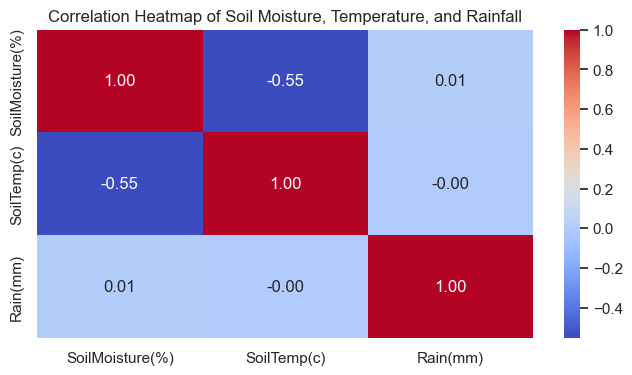

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = mtalbert[['SoilMoisture(%)', 'SoilTemp(c)', 'Rain(mm)']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Soil Moisture, Temperature, and Rainfall')
plt.show()

Soil Moisture vs. Soil Temperature:
- As soil temperature increases, soil moisture tends to decrease, and vice versa.

Soil Moisture vs. Rainfall:
-  Although rain directly adds moisture to the soil, the overall effect on soil moisture levels can be influenced by other environmental factors, like soil type, land cover, and temperature.

Soil Temperature vs. Rainfall:
- Soil temperature and rainfall seem to be largely independent, as their correlation is close to zero. This is because we shall check the lag time in response

In [24]:
print(mtalbert.dtypes)


Timestamp (UTC+12:00)    datetime64[ns]
Rain(mm)                        float64
SoilTemp(c)                     float64
SoilMoisture(%)                 float64
Year                              int32
Month                             int32
Season                           object
dtype: object


In [25]:
mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])

for days in [1, 3, 7, 14, 21, 28, 35, 45]:
    mtalbert[f'future_{days}_days_temp'] = mtalbert['SoilTemp(c)'].shift(-days * 96)
    mtalbert[f'future_{days}_days_rain'] = mtalbert['Rain(mm)'].shift(-days * 96)


# Calculate rolling mean and standard deviation for all variables
rolling_mean_moisture = mtalbert['SoilMoisture(%)'].rolling(window=7 * 96).mean().rename('rolling_mean_moisture')
rolling_std_moisture = mtalbert['SoilMoisture(%)'].rolling(window=7 * 96).std().rename('rolling_std_moisture')

In [26]:
mtalbert.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),future_1_days_temp,future_1_days_rain,future_3_days_temp,future_3_days_rain,future_7_days_temp,future_7_days_rain,future_14_days_temp,future_14_days_rain,future_21_days_temp,future_21_days_rain,future_28_days_temp,future_28_days_rain,future_35_days_temp,future_35_days_rain,future_45_days_temp,future_45_days_rain
0,2018-07-07 11:15:00,0.0,10.4,37.364,11.0,0.0,11.6,0.00,11.0,0.0,15.6,0.00,13.1,0.0,13.3,0.0,12.4,0.0,10.8,0.0
1,2018-07-07 11:30:00,0.0,10.4,37.594,11.0,0.0,11.6,0.00,11.0,0.0,15.6,0.00,13.1,0.0,13.3,0.0,12.4,0.0,10.7,0.0
2,2018-07-07 11:45:00,0.0,10.4,37.590,11.0,0.0,11.6,0.00,11.0,0.0,15.6,0.52,13.1,0.0,13.3,0.0,12.4,0.0,10.7,0.0
3,2018-07-07 12:00:00,0.0,10.5,37.587,11.0,0.0,11.6,0.52,11.0,0.0,15.6,0.00,13.1,0.0,13.4,0.0,12.4,0.0,10.7,0.0
4,2018-07-07 12:15:00,0.0,10.5,37.584,11.1,0.0,11.6,0.00,11.0,0.0,15.6,0.00,13.1,0.0,13.4,0.0,12.4,0.0,10.7,0.0


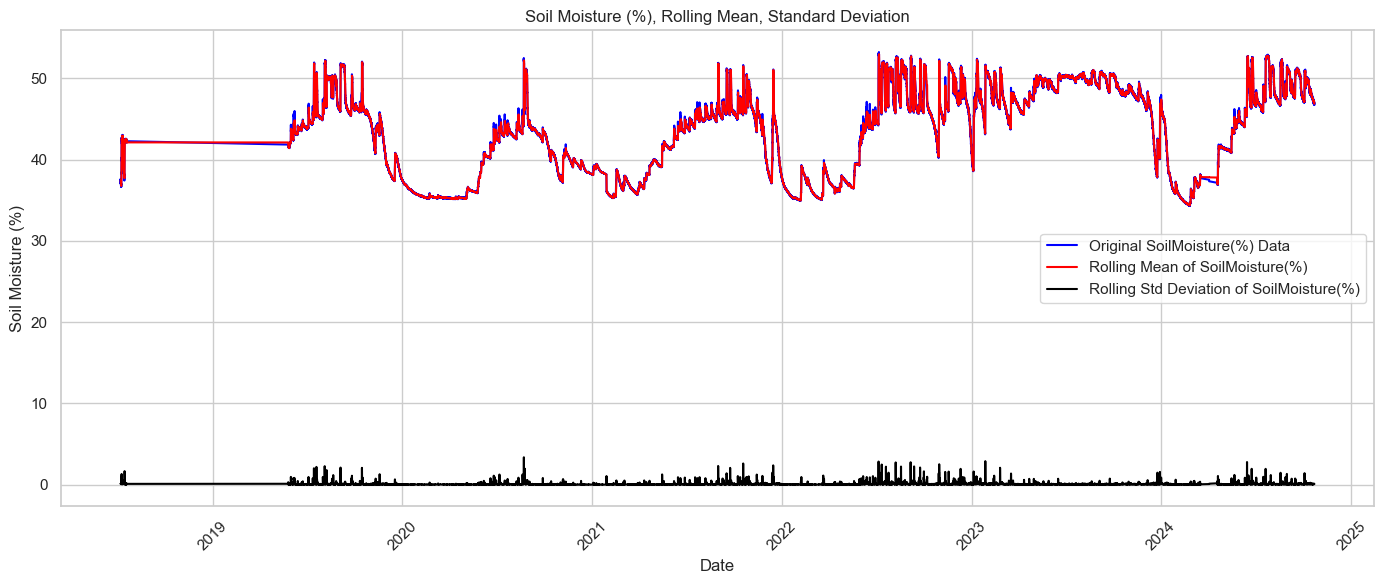

In [27]:
import matplotlib.pyplot as plt

# Ensure 'Timestamp (UTC+12:00)' is a datetime object for plotting
mtalbert['Timestamp (UTC+12:00)'] = pd.to_datetime(mtalbert['Timestamp (UTC+12:00)'])

# Calculate rolling mean and rolling standard deviation (if not already calculated)
if 'rolling_mean_moisture' not in mtalbert.columns:
    mtalbert['rolling_mean_moisture'] = mtalbert['SoilMoisture(%)'].rolling(window=30).mean()  # Adjust window size as needed
if 'rolling_std_moisture' not in mtalbert.columns:
    mtalbert['rolling_std_moisture'] = mtalbert['SoilMoisture(%)'].rolling(window=30).std()

plt.figure(figsize=(14, 6))

# Plot original soil moisture data
plt.plot(mtalbert['Timestamp (UTC+12:00)'], mtalbert['SoilMoisture(%)'], color="blue", label="Original SoilMoisture(%) Data")

# Plot rolling mean
plt.plot(mtalbert['Timestamp (UTC+12:00)'], mtalbert['rolling_mean_moisture'], color="red", label="Rolling Mean of SoilMoisture(%)")

# Plot rolling standard deviation
plt.plot(mtalbert['Timestamp (UTC+12:00)'], mtalbert['rolling_std_moisture'], color="black", label="Rolling Std Deviation of SoilMoisture(%)")

plt.title("Soil Moisture (%), Rolling Mean, Standard Deviation")
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Soil Moisture (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


the augmented Dickey-Fuller test from the statsmodels package.

-There are 96 intervals in a day (since 24 hours * 4 intervals per hour).
- For 45 days, need to consider ( 45 \times 96 = 4,320 ) intervals.
- For 30 days, need to consider ( 45 \times 96 = 2880 ) intervals.

In [28]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

result = adfuller(mtalbert['SoilMoisture(%)'].dropna())  # Drop NaN values
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Since -4.1703 is less than -3.4305 (1% level), -2.8616 (5% level), and -2.5668 (10% level), this reinforces that the time series is stationary.
# time series data for soil moisture is likely stationary, as evidenced by the negative ADF statistic and the low p-value.

ADF Statistic: -4.913913769230541
p-value: 3.2763572652355275e-05
Critical Values: {'1%': -3.4303848797205907, '5%': -2.8615554163693138, '10%': -2.5667782055801167}


# Time Response Analysis


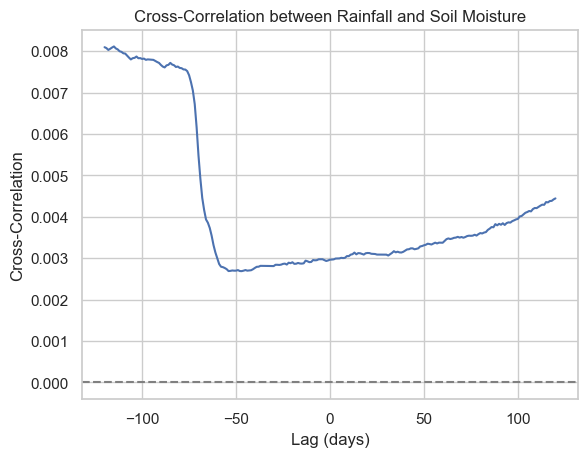

In [29]:
# how much lag time
from statsmodels.tsa.stattools import ccf

lag_correlation = ccf(mtalbert['Rain(mm)'], mtalbert['SoilMoisture(%)'])
import numpy as np
import matplotlib.pyplot as plt

# Create lag plot (up to 30 lags)
lags = np.arange(-120, 121)
plt.plot(lags, lag_correlation[:241])  # Plot correlation for lags from -30 to +30
plt.axhline(0, color='gray', linestyle='--')
plt.title('Cross-Correlation between Rainfall and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.show()


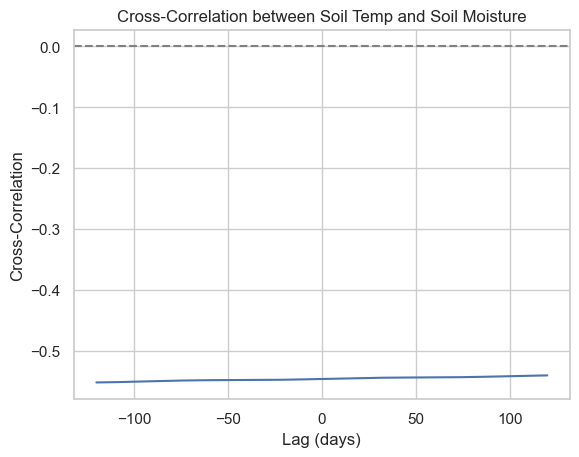

In [30]:
lag_correlation = ccf(mtalbert['SoilTemp(c)'], mtalbert['SoilMoisture(%)'])

# Create lag plot (up to 30 lags)
lags = np.arange(-120, 121)
plt.plot(lags, lag_correlation[:241])  # Plot correlation for lags from -30 to +30
plt.axhline(0, color='gray', linestyle='--')
plt.title('Cross-Correlation between Soil Temp and Soil Moisture')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.show()

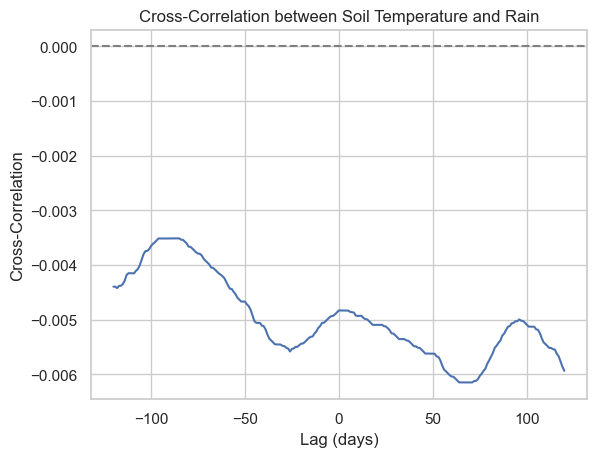

In [31]:
lag_correlation = ccf(mtalbert['SoilTemp(c)'], mtalbert['Rain(mm)'])

# Create lag plot (up to 30 lags)
lags = np.arange(-120, 121)
plt.plot(lags, lag_correlation[:241])  # Plot correlation for lags from -30 to +30
plt.axhline(0, color='gray', linestyle='--')
plt.title('Cross-Correlation between Soil Temperature and Rain')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.show()

A downward slope in the cross-correlation plot indicates a negative correlation between the two time series. This means that as one series increases, the other tends to decrease.

In [32]:
mtalbert.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),future_1_days_temp,future_1_days_rain,future_3_days_temp,future_3_days_rain,future_7_days_temp,future_7_days_rain,...,future_21_days_temp,future_21_days_rain,future_28_days_temp,future_28_days_rain,future_35_days_temp,future_35_days_rain,future_45_days_temp,future_45_days_rain,rolling_mean_moisture,rolling_std_moisture
0,2018-07-07 11:15:00,0.0,10.4,37.364,11.0,0.0,11.6,0.00,11.0,0.0,...,13.1,0.0,13.3,0.0,12.4,0.0,10.8,0.0,NaN,NaN
1,2018-07-07 11:30:00,0.0,10.4,37.594,11.0,0.0,11.6,0.00,11.0,0.0,...,13.1,0.0,13.3,0.0,12.4,0.0,10.7,0.0,NaN,NaN
2,2018-07-07 11:45:00,0.0,10.4,37.590,11.0,0.0,11.6,0.00,11.0,0.0,...,13.1,0.0,13.3,0.0,12.4,0.0,10.7,0.0,NaN,NaN
3,2018-07-07 12:00:00,0.0,10.5,37.587,11.0,0.0,11.6,0.52,11.0,0.0,...,13.1,0.0,13.4,0.0,12.4,0.0,10.7,0.0,NaN,NaN
4,2018-07-07 12:15:00,0.0,10.5,37.584,11.1,0.0,11.6,0.00,11.0,0.0,...,13.1,0.0,13.4,0.0,12.4,0.0,10.7,0.0,NaN,NaN


In [33]:
mtalbert['Timestamp (UTC+12:00)'] = pd.to_datetime(mtalbert['Timestamp (UTC+12:00)'])
mtalbert.set_index('Timestamp (UTC+12:00)', inplace=True)

mtalbert_hourly = mtalbert.resample('H').agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'sum'
})

mtalbert_hourly

C:\Users\Ying\AppData\Local\Temp\ipykernel_1948\1374934518.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mtalbert_hourly = mtalbert.resample('H').agg({


,SoilMoisture(%),SoilTemp(c),Rain(mm)
Timestamp (UTC+12:00),,,
2018-07-07 11:00:00,37.51600,10.40000,0.0
2018-07-07 12:00:00,37.52375,10.60000,0.0
2018-07-07 13:00:00,37.57200,10.70000,0.0
2018-07-07 14:00:00,37.34300,10.72500,0.0
2018-07-07 15:00:00,37.35050,10.95000,0.0
...,...,...,...
2024-10-21 16:00:00,46.87725,18.09575,0.0
2024-10-21 17:00:00,46.84125,18.35650,0.0
2024-10-21 18:00:00,46.82150,18.38825,0.0


In [34]:
# Resample the data to daily frequency
mtalbert_daily = mtalbert.resample('D').agg({
    'SoilTemp(c)': 'mean',       # Mean temperature per day
    'Rain(mm)': 'sum',           # Total rainfall per day
    'SoilMoisture(%)': 'mean'    # Mean soil moisture per day
})

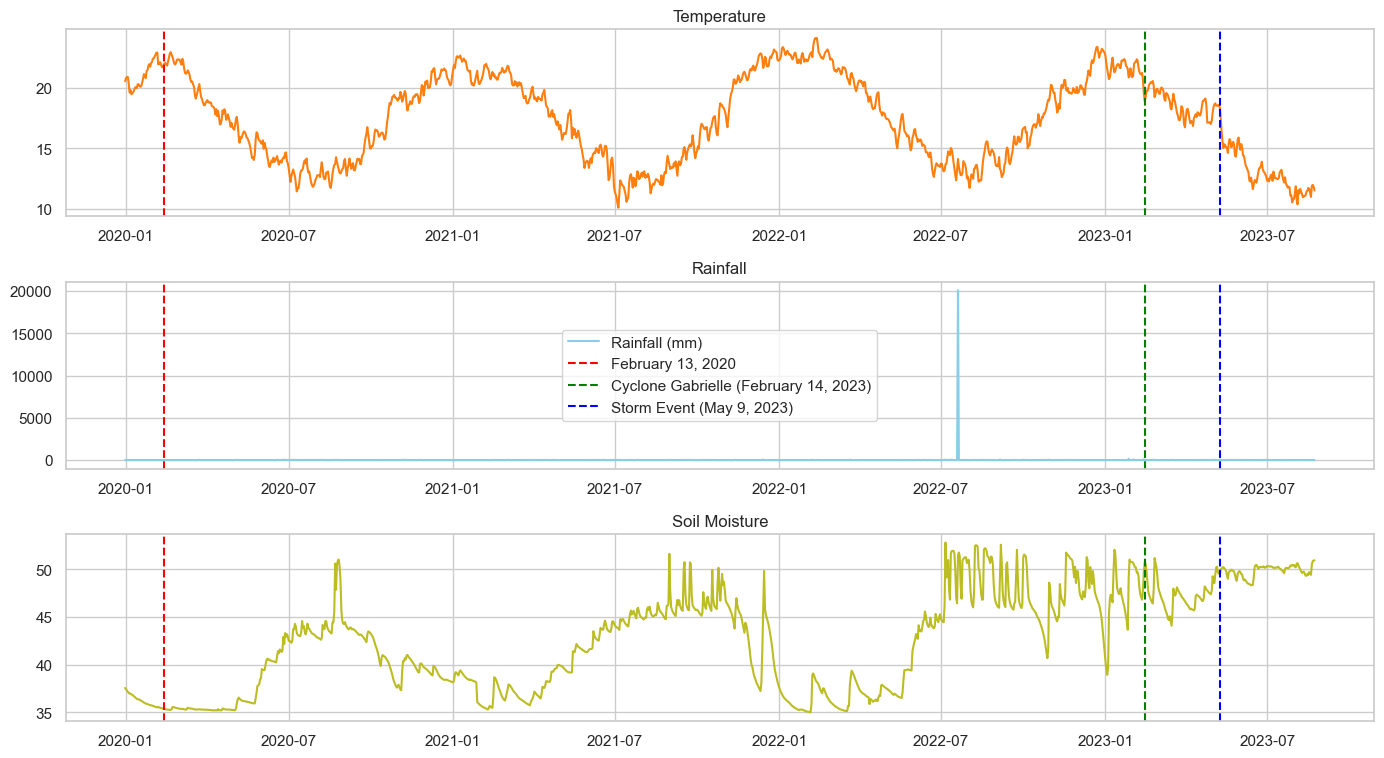

In [35]:
start_date = '2019-12-31 00:00:00'
end_date = '2023-08-23 04:00:00'

impact_data = mtalbert_daily.loc[start_date:end_date]


plt.figure(figsize=(14, 10))

# Temperature plot
plt.subplot(4, 1, 1)
plt.plot(impact_data.index, impact_data['SoilTemp(c)'], label='Temperature (C)', color='tab:orange')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.title('Temperature')

# Rainfall plot
plt.subplot(4, 1, 2)
plt.plot(impact_data.index, impact_data['Rain(mm)'], label='Rainfall (mm)', color='skyblue')  
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.title('Rainfall')
plt.legend(loc ="center")

# Soil Moisture plot
plt.subplot(4, 1, 3)
plt.plot(impact_data.index, impact_data['SoilMoisture(%)'], label='Soil Moisture (%)', color='tab:olive')
plt.axvline(pd.Timestamp('2020-02-13'), color='red', linestyle='--', label='February 13, 2020')
plt.axvline(pd.Timestamp('2023-02-14'), color='green', linestyle='--', label='Cyclone Gabrielle (February 14, 2023)')
plt.axvline(pd.Timestamp('2023-05-09'), color='blue', linestyle='--', label='Storm Event (May 9, 2023)')
plt.title('Soil Moisture')

plt.tight_layout()
plt.show()

C:\Users\Ying\AppData\Local\Temp\ipykernel_1948\926179458.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  mtalbert['SoilMoisture(%)'].resample('A').mean().plot.bar()
C:\Users\Ying\AppData\Local\Temp\ipykernel_1948\926179458.py:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(ticks=range(len(mtalbert['SoilMoisture(%)'].resample('A').mean())), labels=[f'{year}-07-07' for year in mtalbert['SoilMoisture(%)'].resample('A').mean().index.year],rotation=45)


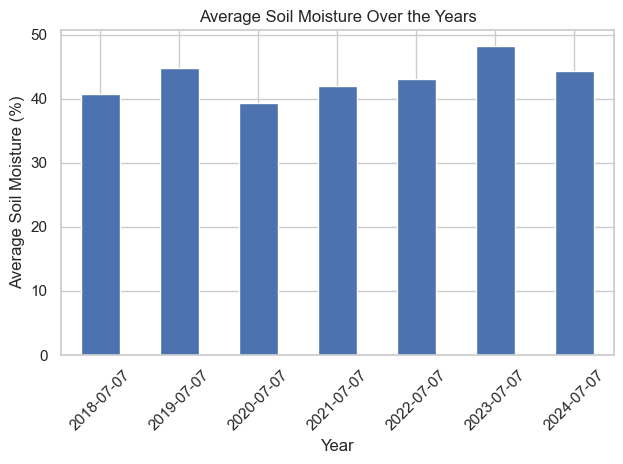

In [36]:
# mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
# mtalbert.head()

# mtalbert.set_index('Timestamp (UTC+12:00)', inplace=True)

mtalbert['SoilMoisture(%)'].resample('A').mean().plot.bar()
plt.xticks(ticks=range(len(mtalbert['SoilMoisture(%)'].resample('A').mean())), labels=[f'{year}-07-07' for year in mtalbert['SoilMoisture(%)'].resample('A').mean().index.year],rotation=45) 
plt.xlabel('Year')
plt.ylabel('Average Soil Moisture (%)')
plt.title('Average Soil Moisture Over the Years')
plt.tight_layout()  
plt.show()

C:\Users\Ying\AppData\Local\Temp\ipykernel_1948\588541031.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  mtalbert['SoilTemp(c)'].resample('A').mean().plot.bar()
C:\Users\Ying\AppData\Local\Temp\ipykernel_1948\588541031.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(ticks=range(len(mtalbert['SoilTemp(c)'].resample('A').mean())), labels=[f'{year}-07-07' for year in mtalbert['SoilTemp(c)'].resample('A').mean().index.year],rotation=45)


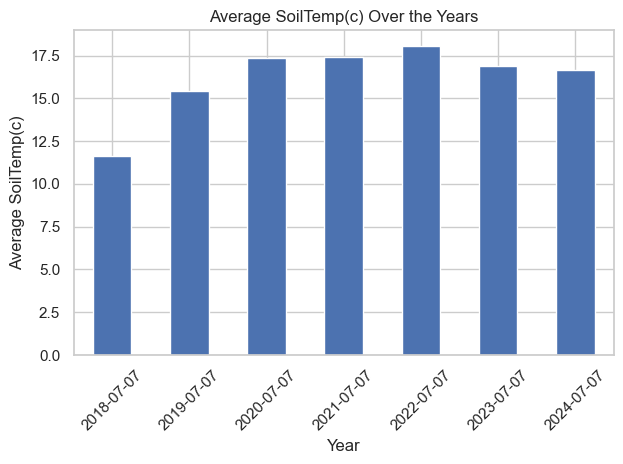

In [37]:
mtalbert['SoilTemp(c)'].resample('A').mean().plot.bar()
plt.xticks(ticks=range(len(mtalbert['SoilTemp(c)'].resample('A').mean())), labels=[f'{year}-07-07' for year in mtalbert['SoilTemp(c)'].resample('A').mean().index.year],rotation=45) 
plt.xlabel('Year')
plt.ylabel('Average SoilTemp(c)')
plt.title('Average SoilTemp(c) Over the Years')
plt.tight_layout()  
plt.show()

C:\Users\Ying\AppData\Local\Temp\ipykernel_1948\3617316051.py:4: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  mtalbert['Rain(mm)'].resample('A').sum().plot.bar()
C:\Users\Ying\AppData\Local\Temp\ipykernel_1948\3617316051.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(ticks=range(len(mtalbert['Rain(mm)'].resample('A').sum())), labels=[f'{year}-07-07' for year in mtalbert['Rain(mm)'].resample('A').sum().index.year],rotation=45)


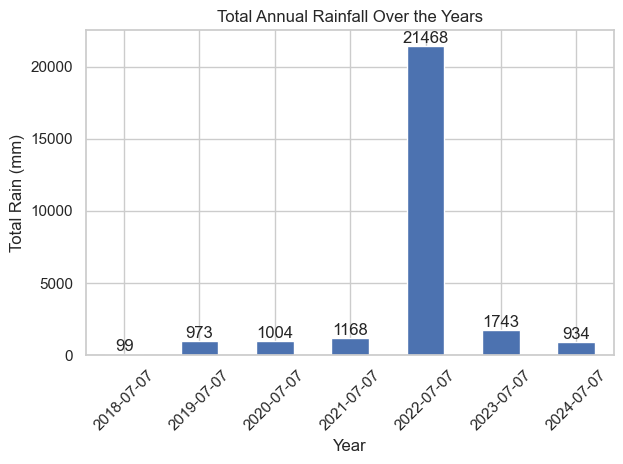

In [38]:
# insight into the overall amount of rain
import matplotlib.pyplot as plt

mtalbert['Rain(mm)'].resample('A').sum().plot.bar()

plt.xticks(ticks=range(len(mtalbert['Rain(mm)'].resample('A').sum())), labels=[f'{year}-07-07' for year in mtalbert['Rain(mm)'].resample('A').sum().index.year],rotation=45)  
plt.xlabel('Year')
plt.ylabel('Total Rain (mm)')
plt.title('Total Annual Rainfall Over the Years')
plt.tight_layout() 

for bar in plt.gca().patches: 
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}', 
             ha='center', va='bottom')

plt.show()

In [39]:
mtalbert_daily.mean()


SoilTemp(c)        17.074855
Rain(mm)           11.915811
SoilMoisture(%)    43.447066
dtype: float64

#  Seasonal for soil moisture, soil temperature, and rainfall
- Summer: December to February
- Autumn: March to May
- Winter: June to August
- Spring: September to November

In [40]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]: 
        return 'Autumn'
    elif month in [6, 7, 8]: 
        return 'Winter'
    else:
        return 'Spring'

In [41]:
mtalbert_seasonal = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert_seasonal.head()

mtalbert_seasonal['Year'] = mtalbert_seasonal['Timestamp (UTC+12:00)'].dt.year
mtalbert_seasonal['Month'] = mtalbert_seasonal['Timestamp (UTC+12:00)'].dt.month
mtalbert_seasonal['Season'] = mtalbert_seasonal['Month'].apply(get_season)
mtalbert_seasonal.head()


,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%),Year,Month,Season
0,2018-07-07 11:15:00,0.0,10.4,37.364,2018,7,Winter
1,2018-07-07 11:30:00,0.0,10.4,37.594,2018,7,Winter
2,2018-07-07 11:45:00,0.0,10.4,37.590,2018,7,Winter
3,2018-07-07 12:00:00,0.0,10.5,37.587,2018,7,Winter
4,2018-07-07 12:15:00,0.0,10.5,37.584,2018,7,Winter


In [42]:
seasonal_means = mtalbert_seasonal.groupby(['Year', 'Season']).agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'sum'
}).reset_index()

print(seasonal_means)


    Year  Season  SoilMoisture(%)  SoilTemp(c)  Rain(mm)
0   2018  Winter        40.728507    11.620830     99.91
1   2019  Autumn        42.008578    15.370129     33.75
2   2019  Spring        45.797121    16.380491    351.91
3   2019  Summer        38.699315    21.174496     93.95
4   2019  Winter        46.115090    12.528551    494.29
5   2020  Autumn        35.679585    18.023177    218.94
6   2020  Spring        41.199940    16.879455    217.73
7   2020  Summer        36.932246    21.266529     50.48
8   2020  Winter        43.192310    13.326608    517.68
9   2021  Autumn        38.477429    18.165447    277.75
10  2021  Spring        46.117471    17.074210    308.69
11  2021  Summer        38.624021    21.714410    214.75
12  2021  Winter        44.535087    12.881941    367.64
13  2022  Autumn        37.122928    18.867226    203.50
14  2022  Spring        47.113186    17.126988    416.00
15  2022  Summer        40.173106    22.375220    173.00
16  2022  Winter        47.7797

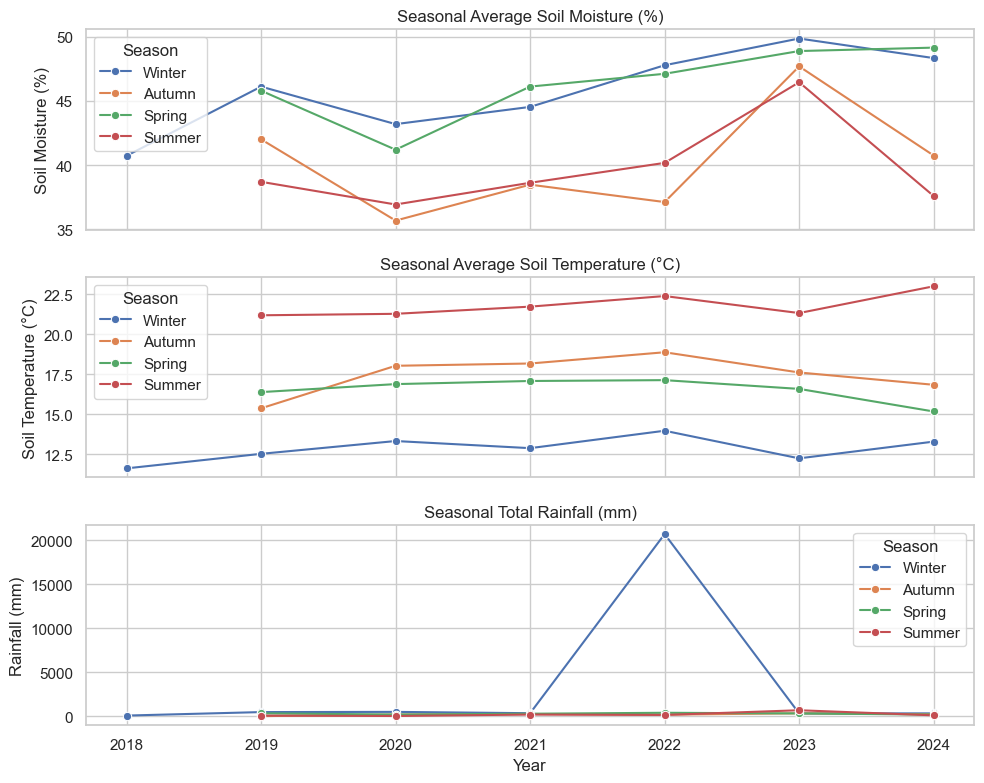

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot SoilMoisture(%)
sns.lineplot(ax=axes[0], data=seasonal_means, x='Year', y='SoilMoisture(%)', hue='Season', marker='o')
axes[0].set_title('Seasonal Average Soil Moisture (%)')
axes[0].set_ylabel('Soil Moisture (%)')

# Plot SoilTemp(c)
sns.lineplot(ax=axes[1], data=seasonal_means, x='Year', y='SoilTemp(c)', hue='Season', marker='o')
axes[1].set_title('Seasonal Average Soil Temperature (°C)')
axes[1].set_ylabel('Soil Temperature (°C)')

# Plot Rain(mm)
sns.lineplot(ax=axes[2], data=seasonal_means, x='Year', y='Rain(mm)', hue='Season', marker='o')
axes[2].set_title('Seasonal Total Rainfall (mm)')
axes[2].set_ylabel('Rainfall (mm)')
axes[2].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()

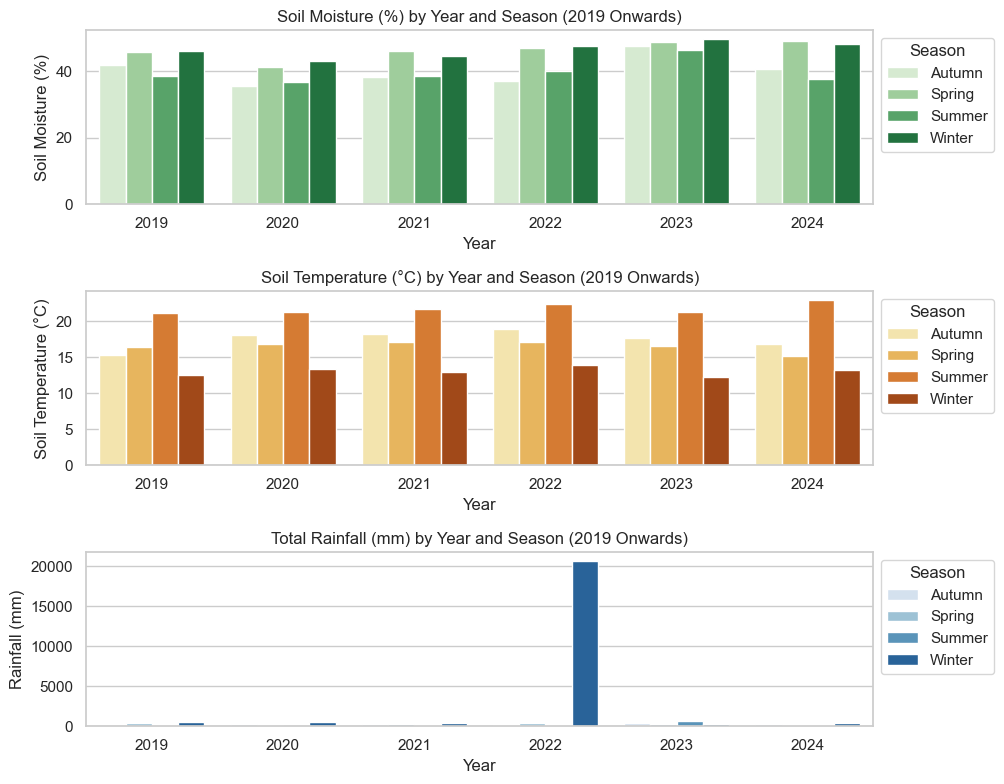

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

seasonal_means_filtered = seasonal_means[seasonal_means['Year'] >= 2019]

# Set up the figure and axes for 3 variables
fig, axes = plt.subplots(3, 1, figsize=(12, 8)) 

# Bar plot for Soil Moisture
sns.barplot(ax=axes[0], data=seasonal_means_filtered, x='Year', y='SoilMoisture(%)', hue='Season', palette='Greens')
axes[0].set_title('Soil Moisture (%) by Year and Season (2019 Onwards)')
axes[0].set_ylabel('Soil Moisture (%)')
axes[0].legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')  # Place legend outside the chart

# Bar plot for Soil Temperature
sns.barplot(ax=axes[1], data=seasonal_means_filtered, x='Year', y='SoilTemp(c)', hue='Season', palette='YlOrBr')
axes[1].set_title('Soil Temperature (°C) by Year and Season (2019 Onwards)')
axes[1].set_ylabel('Soil Temperature (°C)')
axes[1].legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')  # Place legend outside the chart

# Bar plot for Rainfall
sns.barplot(ax=axes[2], data=seasonal_means_filtered, x='Year', y='Rain(mm)', hue='Season', palette='Blues')
axes[2].set_title('Total Rainfall (mm) by Year and Season (2019 Onwards)')
axes[2].set_ylabel('Rainfall (mm)')
axes[2].set_xlabel('Year')
axes[2].legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')  # Place legend outside the chart

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()


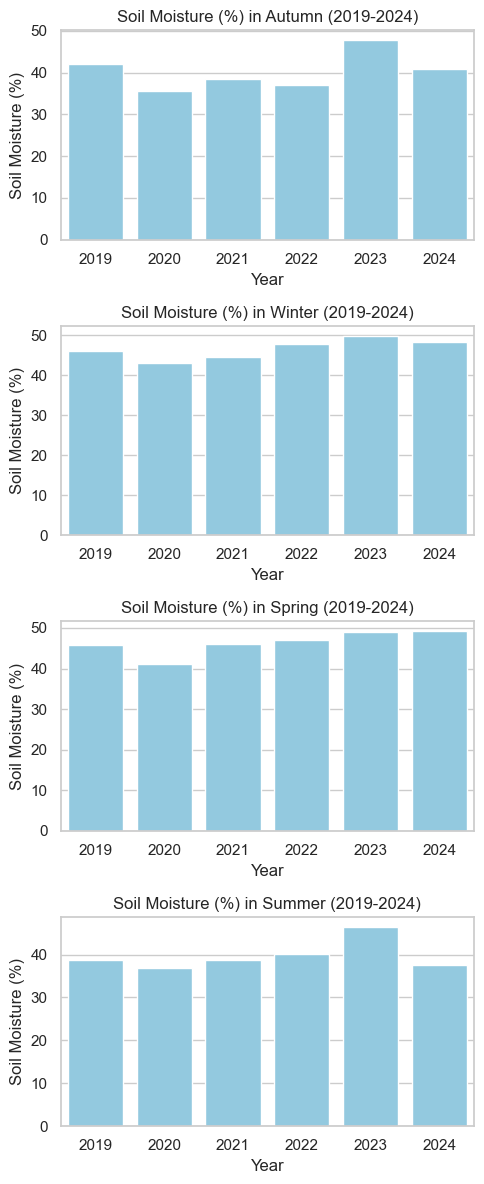

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of seasons
seasons = ['Autumn', 'Winter', 'Spring', 'Summer']

# Set up the figure with subplots for each season
fig, axes = plt.subplots(4, 1, figsize=(5, 12))

# Iterate through each season and plot the values over the years
for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = seasonal_means_filtered[seasonal_means_filtered['Season'] == season]
    
    # Plot for Soil Moisture
    sns.barplot(ax=axes[i], data=season_data, x='Year', y='SoilMoisture(%)', color='skyblue')
    axes[i].set_title(f'Soil Moisture (%) in {season} (2019-2024)')
    axes[i].set_ylabel('Soil Moisture (%)')
    axes[i].set_xlabel('Year')

# Adjust layout
plt.tight_layout()
plt.show()